In [3]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 748 kB 47.8 MB/s 
     |████████████████████████████████| 1.6 MB 41.9 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=c77f7c69f95f709c39f4f1843da222c6fb5866ca6d4e3729ec8ea7d62d78751a
  Stored in directory: /root/.cache/pip/wheels/12/17/67/179b65f101f0d0236e67b2fa039e5d387806348e80205c6985
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23609 sha256=9d8dfed719438e839cacb6617afba377ff703708f9c64401aabc673d4908bf7a
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [4]:
import pm4py
import pandas as pd
from itertools import product, permutations
from datetime import datetime
import graphviz

In [28]:
# data generatioln
l = [zip(w1,w2)
for w1 in permutations('ABCD') if w1.index("A") < w1.index("B") and w1.index("C") < w1.index("D")
for w2 in permutations('1234') if w2.index("1") < w2.index("2") and w2.index("3") < w2.index("4")  ]

#data = [[x+y for (x,y) in z] for z in l ]
data = [[x for (x,y) in z] for z in l ]

In [25]:
# data generatioln
l = [zip(w1,w2)
for w1 in permutations('ABCD') if w1.index("A") < w1.index("B") and w1.index("C") < w1.index("D")
for w2 in permutations('1234')  ]

#data = [[x+y for (x,y) in z] for z in l ]
data = [[y for (x,y) in z] for z in l ]

In [33]:
# data generatioln
l = [zip(w1,w2)
for w1 in permutations('ABCD') if w1.index("A") < w1.index("B") and w1.index("C") < w1.index("D")
for w2 in product('1234', repeat=4)  ]

data = [[x+y for (x,y) in z] for z in l ]
#data = [[y for (x,y) in z] for z in l ]

In [35]:
len(data)

1536

In [36]:
# data to log
df = pd.DataFrame(columns=['case', 'activity', 'timestamp'])
for i, case in enumerate(data):
    for activity in case:
        df = df.append({'case': i, 'activity': activity, 'timestamp': datetime.now()}, ignore_index=True)
dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='activity', timestamp_key='timestamp')
event_log = pm4py.convert_to_event_log(dataframe)

In [20]:
# dfg extraction
dfg, start, end = pm4py.discover_directly_follows_graph(event_log)


In [42]:
s=0
for (orig, dest), freq in dfg.items():
  if orig.startswith("A"):
    s+=freq
s


36

In [49]:
start

{'A': 18, 'C': 18}

In [15]:
d = {
}
for (orig, dest), freq in dfg.items():
  d[(orig[0], dest[0])] = d.get((orig[0], dest[0]), 0) + freq
d

{('A', 'B'): 18,
 ('B', 'C'): 6,
 ('C', 'D'): 18,
 ('A', 'C'): 12,
 ('C', 'B'): 6,
 ('B', 'D'): 12,
 ('D', 'B'): 12,
 ('C', 'A'): 12,
 ('A', 'D'): 6,
 ('D', 'A'): 6}

In [16]:
dot = graphviz.Digraph()
dot.graph_attr.update({'rankdir': 'LR'})
events = set([item for sublist in data for item in sublist])
for e in events:
  if e in start:
    dot.node(e[0], e[0], color="green")
  elif e in end:
    dot.node(e[0], e[0], color="red")
  else:
    dot.node(e[0], e[0])

for (orig, dest), freq in d.items():
  dot.edge(orig, dest, str(freq))
print(dot.source)

digraph {
	graph [rankdir=LR]
	B [label=B color=red]
	B [label=B]
	A [label=A color=green]
	C [label=C color=green]
	D [label=D]
	D [label=D color=red]
	D [label=D color=red]
	B [label=B color=red]
	D [label=D]
	C [label=C]
	A [label=A]
	C [label=C]
	B [label=B]
	A [label=A]
	A [label=A color=green]
	C [label=C color=green]
	A -> B [label=18]
	B -> C [label=6]
	C -> D [label=18]
	A -> C [label=12]
	C -> B [label=6]
	B -> D [label=12]
	D -> B [label=12]
	C -> A [label=12]
	A -> D [label=6]
	D -> A [label=6]
}


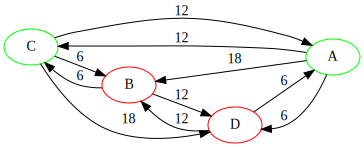

In [9]:
dot

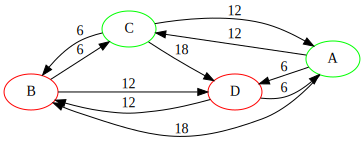

In [17]:
dot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  """Entry point for launching an IPython kernel.


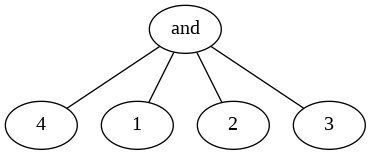

In [27]:
process_tree = pm4py.discover_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  """Entry point for launching an IPython kernel.


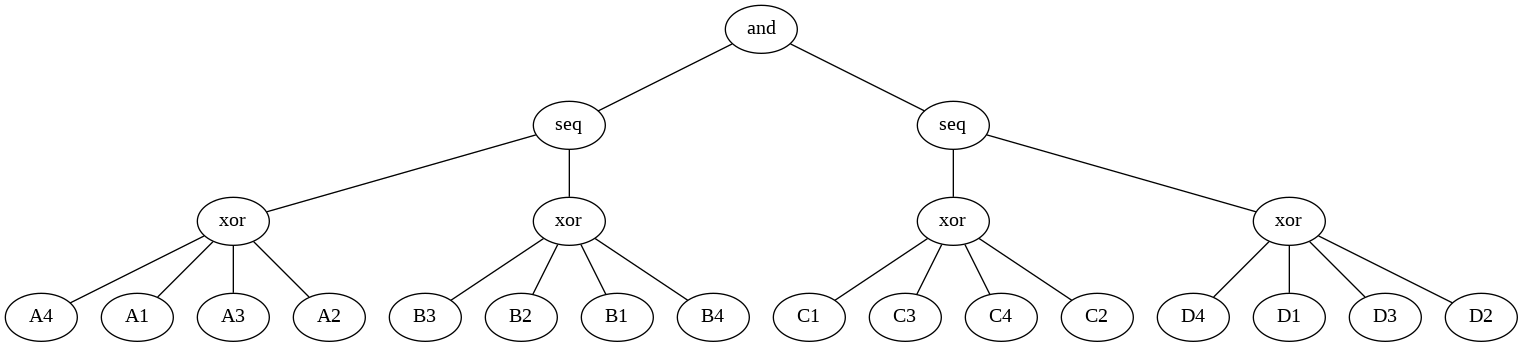

In [37]:
process_tree = pm4py.discover_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)